In [1]:
###Hands on machine learning with scikit learn and tensorflow
##Pretty much this chapter is just like the machine learning 
#stanford coursera course week 1. Will love to see the parallels.

#normal equation check page 108 for more information.
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
#Computing theta_hat with the normal equation and the preceeding
#values.
#In addition, the function used to generate the data is called 
#Gaussian noise.
x_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
print(theta_best)

[[3.96059428]
 [3.24774582]]


In [4]:
#Now we can make predictions using theta_hat:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance.
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.96059428]
 [10.45608592]]


In [5]:
##the following code using linear regression scikit learn:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[3.96059428] [[3.24774582]]
[[ 3.96059428]
 [10.45608592]]


#### Gradient Descent
#(interesting note) The MSE cost function for a linear regression
#is a convex function  which means there are no local minimas there
#is only a global minima.

##Batch gradient descent:
#Neat the author is talking about partial derivatives and the cost 
#function technique used by the standford coursera class. very cool.
#batch gradient descent uses the entirety of the train set hence 
#the name. It is better at scaling to datasets with a hight amount 
#of features than the normal equation. 

#Using different learning rates. the author and the coursera lecturer
#was correct learning rate is important for computational speed 
#and global minimum convergence.

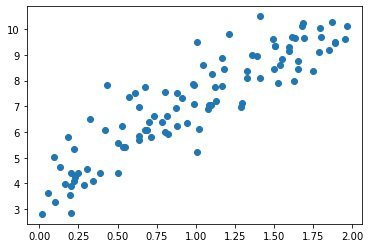

In [7]:
eta = 0.1 #name of the learning rate symbol.
n_iterations = 1000
m = 100
plt.scatter(X, y)

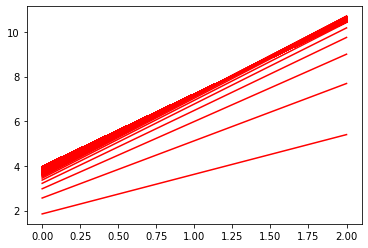

In [8]:
theta = np.random.randn(2,1) #random initialization 
for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients
    x_new = np.array([[0], [2]])
    X_new_b = np.c_[np.ones((2, 1)), X_new] 
    y_predict = X_new_b.dot(theta)
    plt.plot(x_new, y_predict, "r-") 

In [11]:
print(theta)#this algorithm obtained the same values.

[[3.96059428]
 [3.24774582]]


##Stochastic gradient descent:
#Unlike batch gradient descent, stochastic gradient descent picks 
#random instance in the training set at every step and computes 
#the gradients based only on that single instance. 
#Irregular minimization of the cost functions. 

In [12]:
#Fixes for this problem are simulated annealing (or rather setting
#a learning schedule that descreases over time).
n_epochs = 50 
t0, t1 = 5, 50# learning schedule hyperparameters.

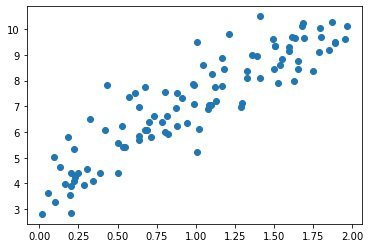

In [13]:
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization
plt.scatter(X, y)

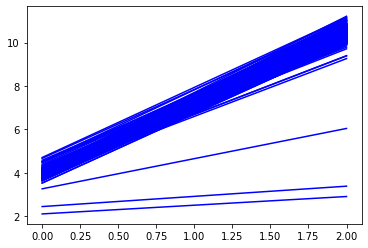

In [14]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch *m + i)
        theta = theta - eta * gradients

        #The following commands are used to plot the 
        #number of iterations on a pyplot 
        x_new = np.array([[0], [2]])
        X_new_b = np.c_[np.ones((2, 1)), X_new] 
        y_predict = X_new_b.dot(theta)
        plt.plot(x_new, y_predict, "b-")
plt.show()

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.42897128],
       [1.53564034]])